# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.model_selection import train_test_split, cross_validate

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [2]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [3]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [4]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006778430938720703(+/- 0.004320806559956525)
avg score time: 0.01420292854309082(+/- 0.006701618097319128)
avg test score: 0.96(+/- 0.024944382578492935)


In [5]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.068275785446167(+/- 0.024151713328090237)
avg score time: 0.027266502380371094(+/- 0.01267905610171249)
avg test score: 0.9533333333333334(+/- 0.03399346342395189)


##### 와인 데이터

In [6]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0025588035583496093(+/- 0.0002469902606681068)
avg score time: 0.006363201141357422(+/- 0.0005719668848304383)
avg test score: 0.9493650793650794(+/- 0.037910929811115976)


In [7]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07725930213928223(+/- 0.032452788094907446)
avg score time: 0.02842230796813965(+/- 0.01715287092362518)
avg test score: 0.9604761904761905(+/- 0.02901941557340049)


##### 유방암 데이터

In [8]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.00604853630065918(+/- 0.006820694793171772)
avg score time: 0.0332486629486084(+/- 0.051594311877579964)
avg test score: 0.9648501785437045(+/- 0.009609970350036127)


In [9]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.14633622169494628(+/- 0.04216476649419855)
avg score time: 0.09185175895690918(+/- 0.01500157027820185)
avg test score: 0.9613414066138798(+/- 0.0069875277399336685)


#### SVC

##### 붓꽃 데이터

In [10]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [11]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time : 0.009876632690429687 (+/- 0.0022324850415904093)
avg score time : 0.0022029876708984375 (+/- 0.00046292536519568044)
avg test score : 0.9666666666666666 (+/- 0.02108185106778919)


In [12]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.16580939292907715 (+/- 0.006498185115907774)
avg score time : 0.023992633819580077 (+/- 0.011244611138591598)
avg test score : 0.9533333333333334 (+/- 0.03399346342395189)


##### 와인 데이터

In [13]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [14]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.010936689376831055 (+/- 0.0021902457505807633)
avg score time : 0.0038313865661621094 (+/- 0.0021309747501471778)
avg test score : 0.9833333333333334 (+/- 0.022222222222222233)


In [15]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.22090702056884765 (+/- 0.1130691860274844)
avg score time : 0.03672213554382324 (+/- 0.028777554016307046)
avg test score : 0.9550793650793651 (+/- 0.02227092169482015)


##### 유방암 데이터

In [16]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [17]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.01938352584838867 (+/- 0.002837936599700437)
avg score time : 0.009035921096801758 (+/- 0.006930384555464741)
avg test score : 0.9736376339077782 (+/- 0.014678541667933545)


In [18]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.23152694702148438 (+/- 0.04845023807978177)
avg score time : 0.04234228134155273 (+/- 0.017291120863548504)
avg test score : 0.9736531594472908 (+/- 0.012383561951220888)


#### Decision Tree

##### 붓꽃 데이터

In [19]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [20]:
cross_val = cross_validate(
    estimator = base_model,
    X= iris.data, y= iris.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0037858963012695314 (+/- 0.0028229067509172247)
avg score time : 0.0022559165954589844 (+/- 0.002153136225577705)
avg test score : 0.9666666666666668 (+/- 0.036514837167011066)


In [21]:
cross_val = cross_validate(
    estimator = bagging_model,
    X= iris.data, y = iris.target,
    cv= 5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.13975152969360352 (+/- 0.046936610274959795)
avg score time: 0.015254068374633788 (+/- 0.007044254564616902)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


##### 와인 데이터

In [22]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [23]:
cross_val = cross_validate(
    estimator = base_model,
    X= wine.data, y= wine.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.004249477386474609 (+/- 0.0015487676594643882)
avg score time : 0.0027141571044921875 (+/- 0.0020433042923336357)
avg test score : 0.8653968253968254 (+/- 0.05056147332736668)


In [24]:
cross_val = cross_validate(
    estimator = bagging_model,
    X= wine.data, y= wine.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.14678430557250977 (+/- 0.035169732129164855)
avg score time : 0.016785907745361327 (+/- 0.006076184440912675)
avg test score : 0.9165079365079365 (+/- 0.06791239744243638)


##### 유방암 데이터

In [25]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)


In [26]:
cross_val = cross_validate(
    estimator = base_model,
    X= cancer.data, y= cancer. target,
    cv= 5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.014784955978393554 (+/- 0.0012683126115948509)
avg score time: 0.001630878448486328 (+/- 0.00034466054336934355)
avg test score: 0.9208818506443098 (+/- 0.011367663900812813)


In [27]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.14931859970092773 (+/- 0.06316474951734453)
avg score time: 0.017954158782958984 (+/- 0.004676291723769616)
avg test score: 0.956078248719143 (+/- 0.018370945204162277)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [28]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

#### KNN

##### 당뇨병 데이터

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [30]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.013249921798706054 (+/- 0.002746265307019705)
avg score time: 0.012058448791503907 (+/- 0.00591299829236704)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [31]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09020524024963379 (+/- 0.02796822961688834)
avg score time: 0.03976750373840332 (+/- 0.014299294923438136)
avg test score: 0.3949775469705695 (+/- 0.03903399087122426)


#### SVR

##### 당뇨병 데이터

In [32]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [33]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test_score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.026928091049194337 (+/- 0.010586487377975948)
avg score time: 0.007595586776733399 (+/- 0.0013826563120483437)
avg test_score: 0.14659868748701582 (+/- 0.021908831719954277)


In [34]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test_score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.14431533813476563 (+/- 0.04043669562115149)
avg score time: 0.04130115509033203 (+/- 0.012350254765158282)
avg test_score: 0.059857277327053995 (+/- 0.025610651146338932)


#### Decision Tree

##### 당뇨병 데이터

In [35]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [36]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print ('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print ('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print ('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.008409595489501953 (+/- 0.0033346465670064025)
avg score time: 0.0013383388519287109 (+/- 6.344472047506875e-05)
avg test score: -0.13100698579469572 (+/- 0.122362445647892)


In [37]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print ('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print ('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print ('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0791123390197754 (+/- 0.02041479825041161)
avg score time: 0.008361482620239257 (+/- 0.0034205360395495456)
avg test score: 0.363858339054225 (+/- 0.06015240847222265)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [41]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_iris

### Random Forests 분류

In [49]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [50]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.21783671379089356 (+/- 0.002240406575541302)
avg score time: 0.007700920104980469 (+/- 0.001301091599639791)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [51]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.14080958366394042 (+/- 0.0061284356474883795)
avg score time: 0.005080652236938476 (+/- 0.0011973877182118887)
avg test score: 0.9609523809523809 (+/- 0.02214499050996228)


In [52]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.26024618148803713 (+/- 0.06458243341606926)
avg score time: 0.006976604461669922 (+/- 0.002325437368525925)
avg test score: 0.9578481602235678 (+/- 0.025635952124131434)


### Random Forests 회귀

In [53]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [57]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3364872455596924 (+/- 0.12463596314570552)
avg score time: 0.006093215942382812 (+/- 0.0004510001213991084)
avg test score: 0.41652064121419696 (+/- 0.04816253434638456)


In [56]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.6688665866851806 (+/- 0.03620953653384974)
avg score time: 0.007933378219604492 (+/- 0.002082388892532935)
avg test score: 0.8146309546290809 (+/- 0.06758021827288699)


### Extremely Randomized Trees 분류

In [58]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [59]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.22708449363708497 (+/- 0.07921978924249465)
avg score time: 0.010410690307617187 (+/- 0.004598036050520076)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [60]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1720137119293213 (+/- 0.003352880491129087)
avg score time: 0.007988357543945312 (+/- 0.0005556717762721737)
avg test score: 0.9777777777777779 (+/- 0.020786985482077462)


In [61]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.22618451118469238 (+/- 0.04215309238104976)
avg score time: 0.010328960418701173 (+/- 0.0028865341424567574)
avg test score: 0.9613414066138798 (+/- 0.017177169528965974)


### Extremely Randomized Trees 회귀

In [62]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [63]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3748744487762451 (+/- 0.09428875094045781)
avg score time: 0.019265365600585938 (+/- 0.007202098740061738)
avg test score: 0.4500692548294206 (+/- 0.029412934974916278)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [87]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [88]:
n_classes =3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [89]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

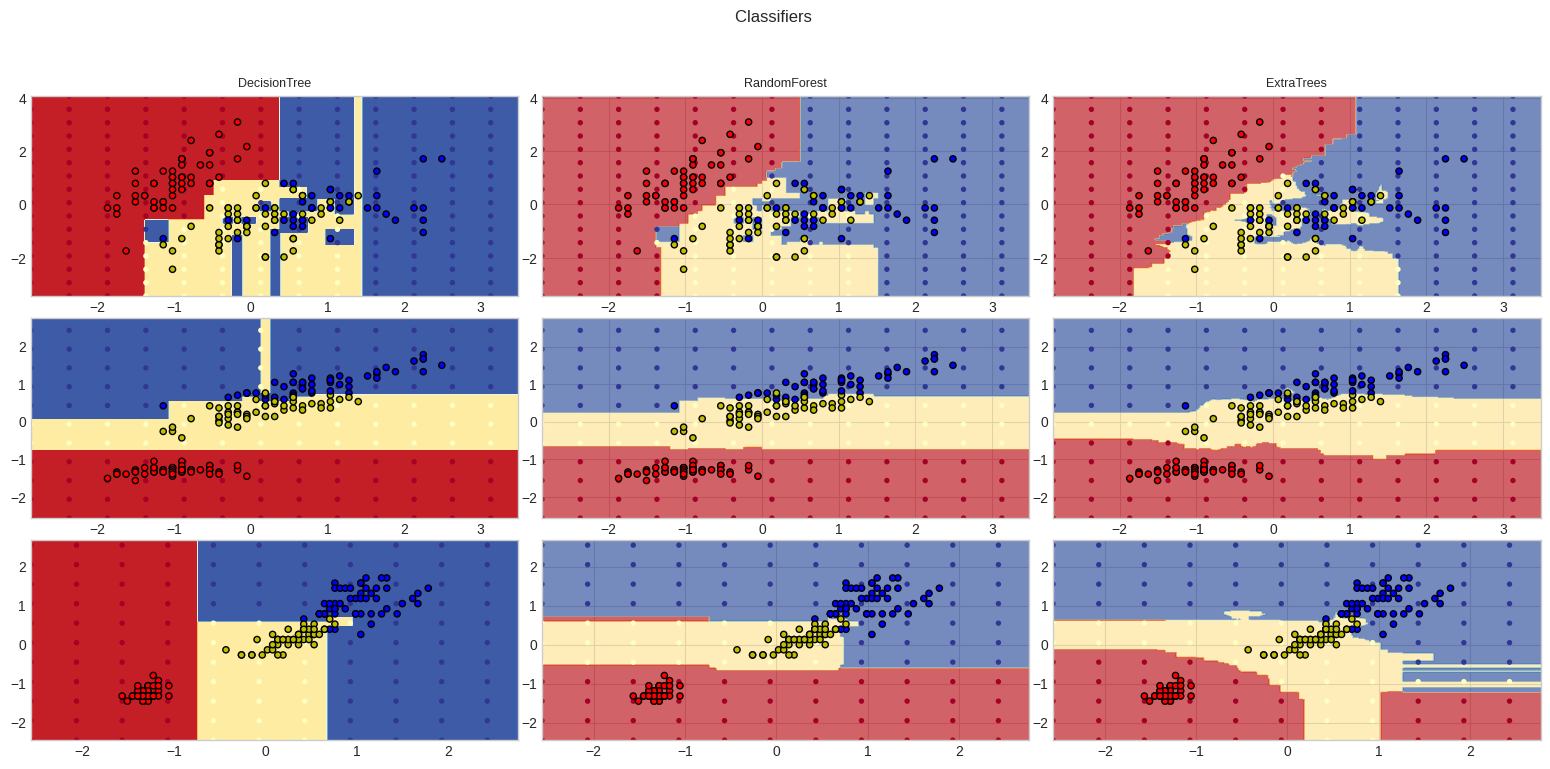

In [90]:
plt.figure(figsize=(16,8))

for pair in ([0, 1], [0, 2], [2, 3]):
  for model in models:
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X-mean)/std
    model.fit(X,y)
    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]

    if plot_idx >9:
      break

    plt.subplot(3,3,plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    if isinstance(model, DecisionTreeClassifier):
      Z= model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z= Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimators_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z= model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z= Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha= estimators_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                           np.arange(y_min, y_max, plot_step_coarser))

    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)

    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')

    plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap=ListedColormap(['r', 'y', 'b']),
                edgecolor='k', s=20)

    plot_idx += 1


plt.suptitle("Classifiers ", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()



In [93]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

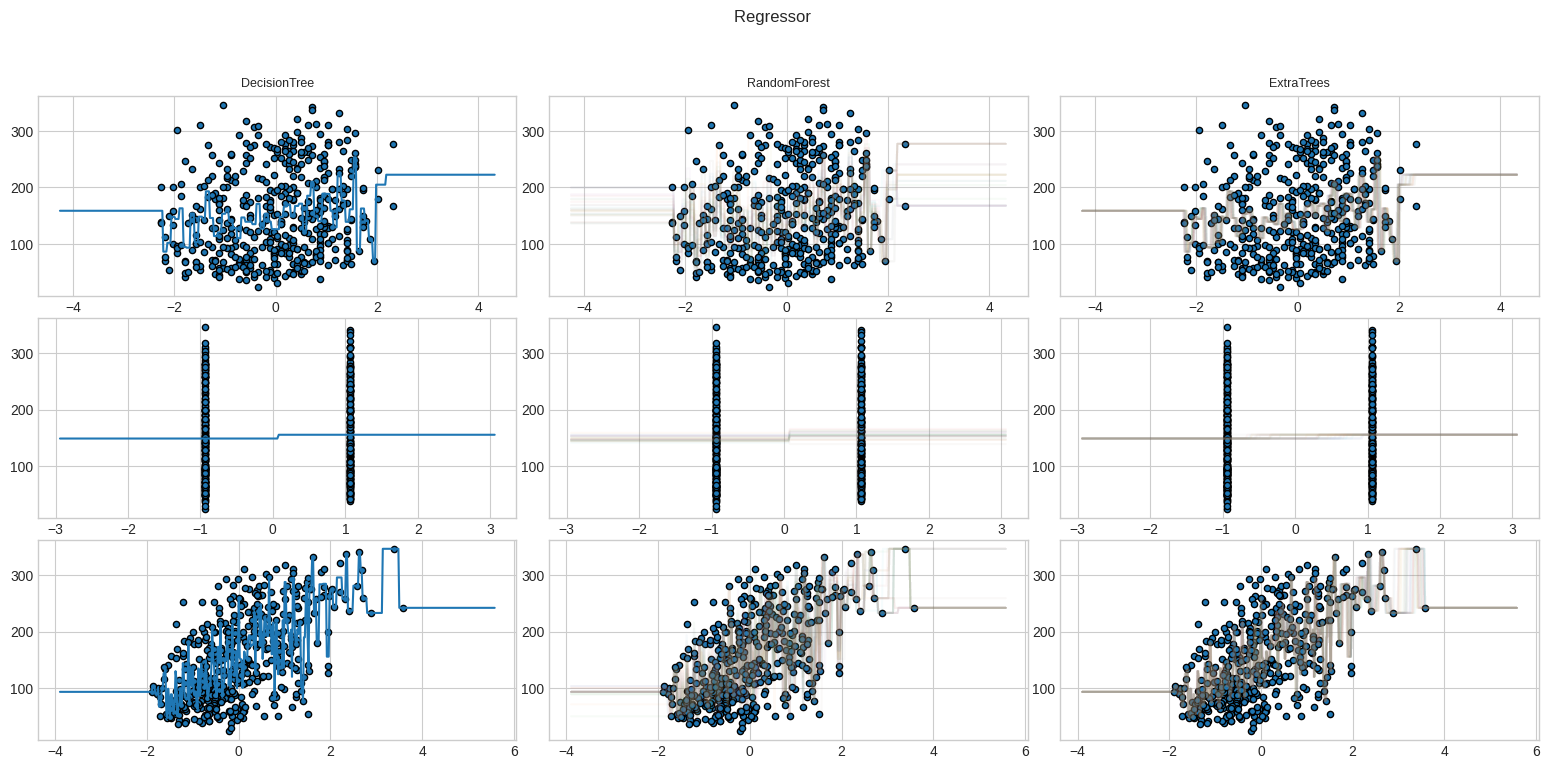

In [98]:
plt.figure(figsize=(16, 8))

# Changed loop structure to correctly manage plot_idx
for i, pair in enumerate(range(3)): # Loop through 3 features
    for j, model in enumerate(models): # Loop through 3 models
        plot_idx = i * len(models) + j + 1 # Calculate plot index

        X = diabetes.data[:, pair]
        y = diabetes.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        model.fit(X.reshape(-1, 1), y)
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Regressor")]

        plt.subplot(3, 3, plot_idx) # Create subplot
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X.min() - 1, X.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx = np.array([(x_min - 1 + i * plot_step) for i in range(int((x_max + 1 - (x_min - 1)) / plot_step) + 1)])

        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1, 1))
            cs = plt.plot(xx, Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1, 1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)

        plt.scatter(X, y, s=20, edgecolor='k')


plt.suptitle("Regressor ", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [101]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [105]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [106]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


avg fit time: 0.08513565063476562 (+/- 0.005050108908352668)
avg score time: 0.010580301284790039 (+/- 0.0021367309348092373)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [107]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


avg fit time: 0.15286097526550294 (+/- 0.01572348318933661)
avg score time: 0.015925502777099608 (+/- 0.004649552636021299)
avg test score: 0.8028571428571428 (+/- 0.16007729929178363)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [108]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

avg fit time: 0.26466822624206543 (+/- 0.031019628988507266)
avg score time: 0.015209150314331055 (+/- 0.0007841640259401975)
avg test score: 0.9718677224033534 (+/- 0.0195587047134823)


### AdaBoost 회귀

In [109]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)


In [112]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.32375507354736327 (+/- 0.12771628890495293)
avg score time: 0.013881587982177734 (+/- 0.004783437639822636)
avg test score: 0.8832982476865567 (+/- 0.025402310469786145)


In [111]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.22078704833984375 (+/- 0.05610128841939141)
avg score time: 0.021929597854614256 (+/- 0.008566639915892158)
avg test score: 0.4164519100917226 (+/- 0.04371049800136565)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [114]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [115]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.4630715370178223 (+/- 0.06593212192405055)
avg score time: 0.003381681442260742 (+/- 0.0009384809617551664)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [116]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 1.1412404537200929 (+/- 0.3515721562101763)
avg score time: 0.011304283142089843 (+/- 0.006047753859053292)
avg test score: 0.9385714285714286 (+/- 0.032068206474093704)


In [117]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 1.0571940898895265 (+/- 0.3148427831523398)
avg score time: 0.002030038833618164 (+/- 0.00014712165871868212)
avg test score: 0.9631268436578171 (+/- 0.021024240542234)


### Gradient Tree Boosting 회귀

In [118]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [119]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.7922270774841309 (+/- 0.054921725379424864)
avg score time: 0.0020363330841064453 (+/- 0.00027077411212604233)
avg test score: 0.8070187642073894 (+/- 0.07414354468375778)


In [120]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1812366485595703 (+/- 0.002532385698757701)
avg score time: 0.0020265102386474608 (+/- 0.00014856821084911358)
avg test score: 0.40545364537088524 (+/- 0.06833334474103578)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [132]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


In [133]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='hard'
)

In [134]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f)[%s]' % (scores.mean(), scores.std(), model_name))


Accuracy: 0.97 (+/- 0.02)[SVC]
Accuracy: 0.95 (+/- 0.03)[GaussianNB]
Accuracy: 0.96 (+/- 0.02)[RandomForestClassifier]
Accuracy: 0.95 (+/- 0.03)[VotingClassifier]


In [137]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='soft',
    weights=[2, 1, 2]
)

In [138]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f)[%s]' % (scores.mean(), scores.std(), model_name))


Accuracy: 0.97 (+/- 0.02)[SVC]
Accuracy: 0.95 (+/- 0.03)[GaussianNB]
Accuracy: 0.96 (+/- 0.02)[RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02)[VotingClassifier]


### 결정 경계 시각화

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [140]:
X = iris.data[:, [0,2]]
y = iris.target

In [141]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma='scale', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                              voting='soft', weights=[2, 1, 2])

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X ,y)
vote_model = vote_model.fit(X, y)

In [142]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 0].min()-1, X[:, 0].max()+1
xx , yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

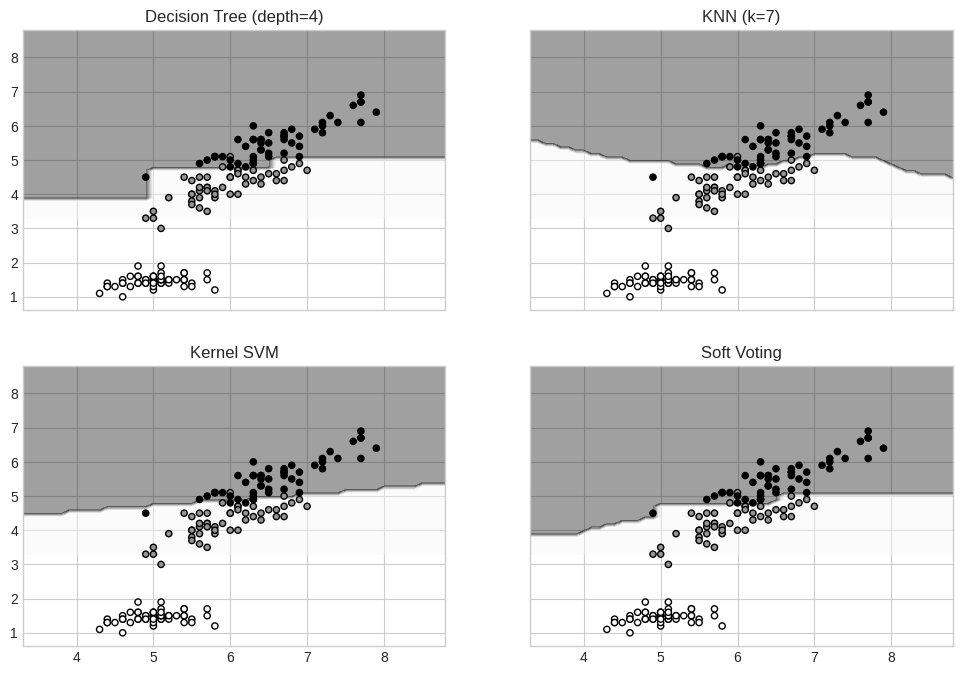

In [144]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [146]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(estimators=[('linearr', model1), ('gbr', model2), ('rfr', model3)],
                             weights=[1,1,1]
                             )

In [147]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('R2: %0.2f (+/- %0.2f)[%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.32 (+/- 0.40)[LinearRegression]
R2: 0.32 (+/- 0.41)[GradientBoostingRegressor]
R2: 0.55 (+/- 0.46)[RandomForestRegressor]
R2: 0.35 (+/- 0.44)[VotingRegressor]


### 회귀식 시각화

In [163]:
X = wine.data[:,0].reshape(-1,1)
y = wine.target

In [164]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
                             weights=[1,1,1]
                             )

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X ,y)
vote_model = vote_model.fit(X,y)

In [165]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

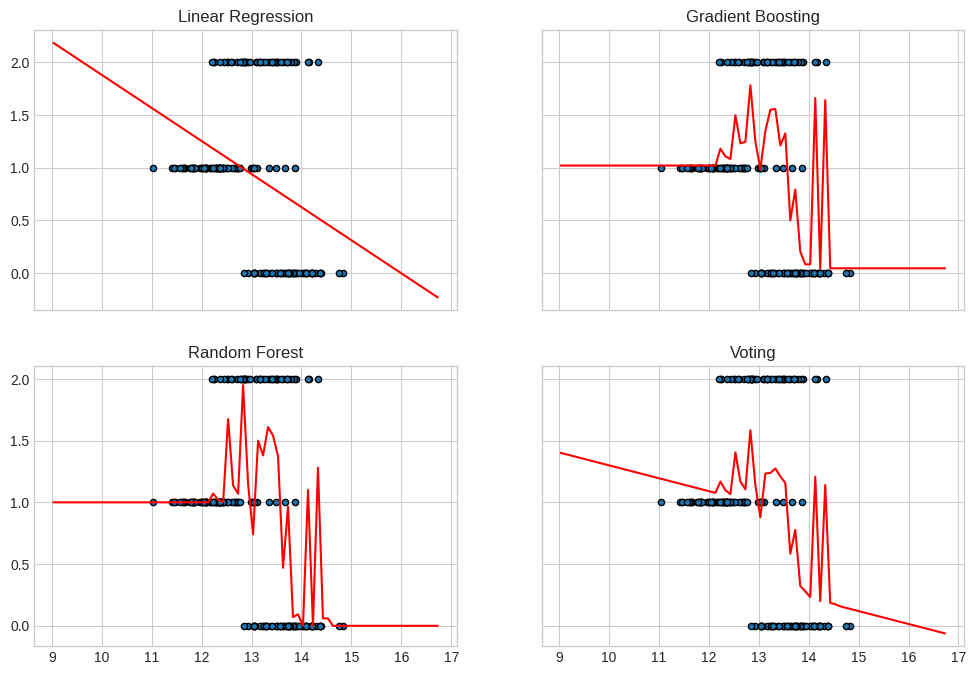

In [166]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [167]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [169]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [170]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [172]:
cross_val = cross_validate(
    estimator = reg,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time : 0.25946316719055174 (+/- 0.06061782636242663)
avg score time : 0.0053046226501464845 (+/- 0.00026638811599316115)
avg test score : 0.3730803965722977 (+/- 0.07041305226979663)


#### 회귀식 시각화

In [179]:
X = cancer.data[:,0].reshape(-1,1)
y = cancer.target

In [180]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

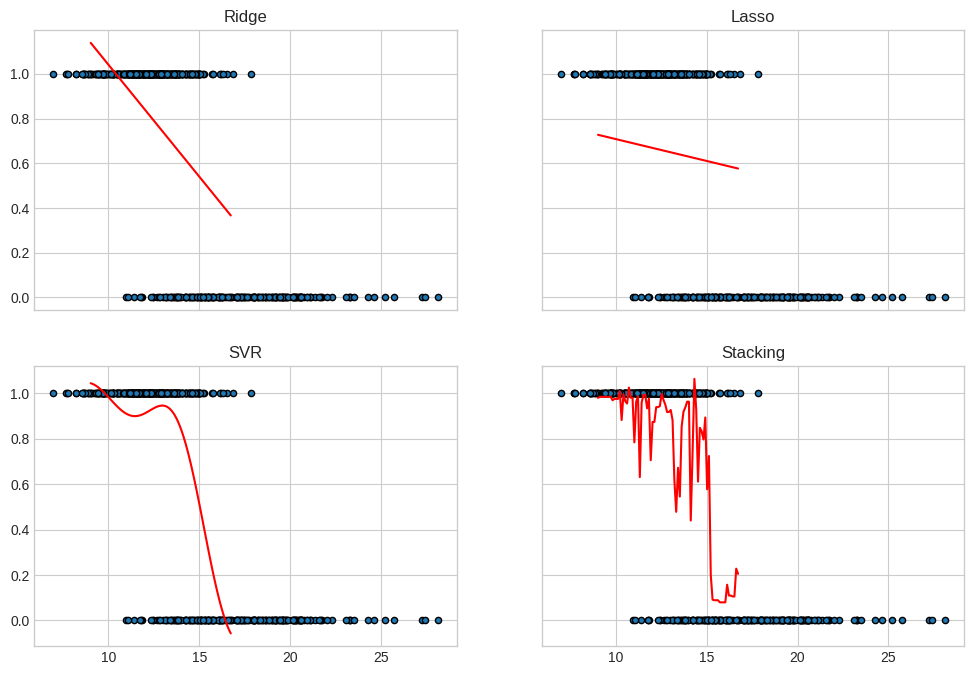

In [181]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, reg],
                          ['Ridge', 'Lasso', 'SVR', 'Stacking']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [183]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('naive', GaussianNB())]

In [184]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

In [186]:
 cross_val = cross_validate(
     estimator =clf,
     X=cancer.data, y=cancer.target,
     cv=5
 )

 print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
 print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
 print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time : 6.401497459411621 (+/- 2.5758887576096505)
avg score time : 0.008704614639282227 (+/- 0.0027116147763749333)
avg test score : 0.9578636857630801 (+/- 0.02027099247139819)


#### 결정 경계 시각화

In [199]:
X = iris.data[:,[0,2]]
y = iris.target

In [200]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
stack = stack.fit(X,y)

In [201]:
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

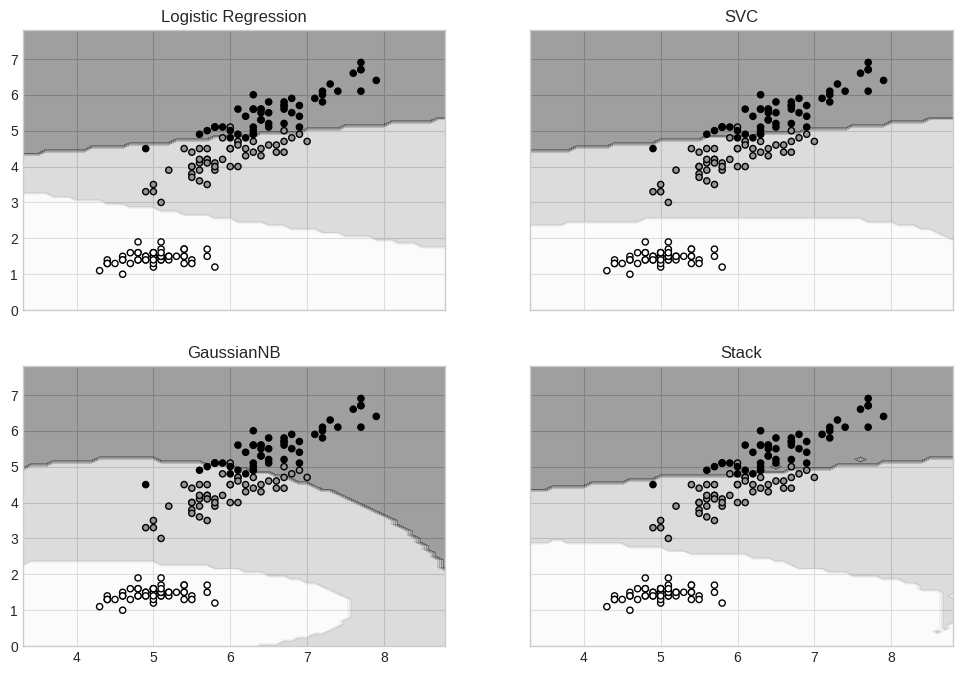

In [202]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC', 'GaussianNB', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()